#Minor Project

#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
Importing necessary modules
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''
Importing dataset from the drive
'''
data = pd.read_csv('/content/drive/MyDrive/Minor_project_ML/Online Retail.csv')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
'''
Finding no of null values in every feature or column
'''
print("No of null values in every columns-")
data.isnull().sum()

No of null values in every columns-


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#Data Preprocessing

In [ ]:
'''
Deep Copying dataset to preserve original dataset
'''
copy_df = data.copy(deep = True)
copy_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [ ]:
'''
Dropping those rows where Description is null
'''
copy_df["Description"].replace(np.nan,"null_values",inplace=True)

In [ ]:
'''
Converting noisy StockCode to their correct StockCode
'''
for i in range(len(data)):
  if(data["StockCode"].iloc[i][-1]>="A" and data["StockCode"].iloc[i][-1]<="Z"):
    copy_df.at[i,'StockCode'] =  data["StockCode"].iloc[i][:5]+str(ord(data["StockCode"].iloc[i][-1])-ord('A')+1)
  elif(data["StockCode"].iloc[i][-1]>="a" and data["StockCode"].iloc[i][-1]<="z"):
    copy_df.at[i,'StockCode'] =  data["StockCode"].iloc[i][:5]+str(ord(data["StockCode"].iloc[i][-1])-ord('a')+1)
copy_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    851231   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    844062       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    840297  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    840295       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [ ]:
'''
Finding no of Stock Codes corresponding to a single Description, will help for further analysis
'''
all_desc = {}
for i in range(len(copy_df)):
  if(copy_df["Description"].iloc[i] in all_desc.keys()):
    all_desc[copy_df["Description"].iloc[i]].add(copy_df["StockCode"].iloc[i])
  else:
    all_desc[copy_df["Description"].iloc[i]]= set([])

print("Description Value with all Stock Codes-")
for i in all_desc:
  if(len(all_desc[i])>1):
    print(i,all_desc[i])

Description Value with all Stock Codes-
null_values {'728017', '900374', '23268', '23400', '22689', '21763', '850492', '848763', 'DCGS016', '850182', '21682', '21805', '21488', '359162', '20854', '847512', '21187', '20886', '22044', '846631', '790712', '17096', '22925', '845631', '374891', '21777', '37474', '22926', '902093', '850861', '22665', '20864', '22943', '22947', '21655', '84691', '22028', '85195', '849271', '22696', '21144', '620952', '79321', '475702', '374441', '475562', '900822', '10134', '72127', '72793', '359163', '85214', '620942', '851322', '358091', '21635', '22452', '21518', '849662', '16015', '461261', '20758', '21274', '85175', '84499', '900422', '22163', '20756', '20849', '21134', '84678', '72781', '84007', '22034', '826132', '21911', '21781', '22467', '20950', '849523', '84754', '37424', '82583', '21637', '791724', '902003', '20686', '82551', '373791', '82567', '21587', '20702', '22194', '85044', '851243', '21318', '21891', '23091', '20863', '20984', '846112', '84

In [ ]:
'''
Finding rows which contains flawed Description which can be dropped, by finding if there exist many small case letters and droping
subsequent rows
'''
all_desc_suspicious = list(all_desc.keys())
all_desc_to_drop = []
print("Possible Rows which have suspicious description to drop - ")
for i in all_desc_suspicious:
  temp_str = ""
  i = str(i)
  cnt = 0
  for j in range(len(i)):
    if(i[j].isdigit()==False and i[j]!=" "):
      temp_str += i[j]
    if(i[j]>='a' and i[j]<='z'):
      cnt +=1

  if(temp_str.isupper()==False and cnt>len(i)/2):
    all_desc_to_drop.append(i)
    print(i)

Possible Rows which have suspicious description to drop - 
Discount
null_values
Manual
Dr. Jam's Arouzer Stress Ball
Bank Charges
amazon
check
damages
Dad's Cab Electronic Meter
*Boombox Ipod Classic
faulty
Dotcom sales
amazon sales
*USB Office Mirror Ball
Dotcomgiftshop Gift Voucher £40.00
Found
Dotcomgiftshop Gift Voucher £50.00
reverse 21/5/10 adjustment
Dotcomgiftshop Gift Voucher £30.00
Dotcomgiftshop Gift Voucher £20.00
mouldy, thrown away.
found
counted
Given away
Dotcom
label mix up
samples/damages
thrown away
incorrectly made-thrown away.
showroom
Adjustment
Dotcomgiftshop Gift Voucher £10.00
Dotcom set
wrongly sold as sets
Amazon sold sets
dotcom sold sets
wrongly sold sets
? sold as sets?
?sold as sets?
Thrown away.
damages/display
damaged stock
broken
throw away
wrong barcode (22467)
wrongly sold (22719) barcode
wrong barcode
barcode problem
?lost
thrown away-can't sell.
thrown away-can't sell
rcvd be air temp fix for dotcom sit
damages?
re dotcom quick fix.
Dotcom sold in 

In [ ]:
all_sum_drop_values = 0
print("No of values in each description value to drop")
all_desc_with_val_dict = dict(copy_df["Description"].value_counts())
for i in range(len(all_desc_to_drop)):
  print(all_desc_to_drop[i],all_desc_with_val_dict[all_desc_to_drop[i]])
  all_sum_drop_values += all_desc_with_val_dict[all_desc_to_drop[i]]
print("Total values which can be dropped-",all_sum_drop_values)

No of values in each description value to drop
Discount 77
null_values 1454
Manual 572
Dr. Jam's Arouzer Stress Ball 2
Bank Charges 37
amazon 8
check 159
damages 45
Dad's Cab Electronic Meter 2
*Boombox Ipod Classic 1
faulty 1
Dotcom sales 2
amazon sales 1
*USB Office Mirror Ball 2
Dotcomgiftshop Gift Voucher £40.00 3
Found 8
Dotcomgiftshop Gift Voucher £50.00 4
reverse 21/5/10 adjustment 2
Dotcomgiftshop Gift Voucher £30.00 7
Dotcomgiftshop Gift Voucher £20.00 9
mouldy, thrown away. 1
found 25
counted 2
Given away 1
Dotcom 1
label mix up 1
samples/damages 1
thrown away 9
incorrectly made-thrown away. 1
showroom 1
Adjustment 2
Dotcomgiftshop Gift Voucher £10.00 8
Dotcom set 1
wrongly sold as sets 1
Amazon sold sets 1
dotcom sold sets 1
wrongly sold sets 1
? sold as sets? 1
?sold as sets? 1
Thrown away. 1
damages/display 1
damaged stock 1
broken 1
throw away 1
wrong barcode (22467) 1
wrongly sold (22719) barcode 1
wrong barcode 1
barcode problem 1
?lost 1
thrown away-can't sell. 1
throw

In [ ]:
'''
Droping noisy Description to have final dataset
'''
data_temp = copy_df[copy_df.Description.isin(all_desc_to_drop) == False]
# print(len(data_temp))

# print(len(data_temp))
data_temp = data_temp.reset_index()
data_temp

index InvoiceNo StockCode                          Description  \
0            0    536365    851231   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    844062       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    840297  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    840295       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
539057  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
539058  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
539059  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
539060  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
539061  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID         Country  
0              6   12/1/2010 8:26       2.55     17850.0  United Kingdom  
1              6   12/1/2010 8:26       3.39     17850.0  United Kingdom  
2              8   12/1/2010 8:26       2.75     17850.0  United Kingdom  
3              6   12/1/2010 8:26       3.39     17850.0  United Kingdom  
4              6   12/1/2010 8:26       3.39     17850.0  United Kingdom  
...          ...              ...        ...         ...             ...  
539057        12  12/9/2011 12:50       0.85     12680.0          France  
539058         6  12/9/2011 12:50       2.10     12680.0          France  
539059         4  12/9/2011 12:50       4.15     12680.0          France  
539060         4  12/9/2011 12:50       4.15     12680.0          France  
539061         3  12/9/2011 12:50       4.95     12680.0          France  

[539062 rows x 9 columns]

In [ ]:
'''
Extracting Month and Time from dataset and creating corresponding new columns for them
'''
invoice_list = data_temp['InvoiceDate'].to_numpy()
#print(invoice_list)
l = len(invoice_list)
month_list = []
time_list = [] #AM = 0, PM = 1
for i in range(0,l,1):
  temp_list = invoice_list[i].split()
  #print(temp_list)
  temp_str = ''
  for j in range(0,len(temp_list[0]),1):
    if temp_list[0][j] == '/':
      break
    else:
      temp_str += temp_list[0][j]
  month_list.append(int(temp_str))
  temp_str = ''
  for j in range(0,len(temp_list[1]),1):
    if temp_list[1][j] == ':':
      break
    else:
      temp_str += temp_list[1][j]
  temp_str = int(temp_str)
  for k in range(0,6,1):
    if temp_str >= k*4 and temp_str < (k+1)*4:
      time_list.append(k)

  # if temp_str >= 0 and temp_str < 4:
  #   time_list.append(0)
  # elif temp_str >= 4 and temp_str < 8:
  #   time_list.append(1)
  # elif temp_str >= 8 and temp_str < 12:
  #   time_list.append(2)
  # elif temp_str >= 12 and temp_str < 16:
  #   time_list.append(3)
  # elif temp_str >= 16 and temp_str < 20:
  #   time_list.append(4)
  # else:
  #   time_list.append(5)

In [ ]:
data_temp['Month'] = month_list
data_temp['Time'] = time_list

data_temp

index InvoiceNo StockCode                          Description  \
0            0    536365    851231   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    844062       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    840297  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    840295       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
539057  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
539058  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
539059  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
539060  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
539061  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID         Country  \
0              6   12/1/2010 8:26       2.55     17850.0  United Kingdom   
1              6   12/1/2010 8:26       3.39     17850.0  United Kingdom   
2              8   12/1/2010 8:26       2.75     17850.0  United Kingdom   
3              6   12/1/2010 8:26       3.39     17850.0  United Kingdom   
4              6   12/1/2010 8:26       3.39     17850.0  United Kingdom   
...          ...              ...        ...         ...             ...   
539057        12  12/9/2011 12:50       0.85     12680.0          France   
539058         6  12/9/2011 12:50       2.10     12680.0          France   
539059         4  12/9/2011 12:50       4.15     12680.0          France   
539060         4  12/9/2011 12:50       4.15     12680.0          France   
539061         3  12/9/2011 12:50       4.95     12680.0          France   

        Month  Time  
0          12     2  
1          12     2  
2          12     2  
3          12     2  
4          12     2  
...       ...   ...  
539057     12     3  
539058     12     3  
539059     12     3  
539060     12     3  
539061     12     3  

[539062 rows x 11 columns]

In [ ]:
'''
Converting negative Quantity and UnitPrice to their positive value
'''
for i in range(len(data_temp)):
  if(float(data_temp["UnitPrice"].iloc[i])<0):
    data_temp["UnitPrice"].iloc[i]= -1*float(data_temp["UnitPrice"].iloc[i])
  if(int(data_temp["Quantity"].iloc[i])<0):
    data_temp["Quantity"].iloc[i]= -1*int(data_temp["Quantity"].iloc[i])

data_temp

index InvoiceNo StockCode                          Description  \
0            0    536365    851231   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    844062       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    840297  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    840295       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
539057  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
539058  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
539059  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
539060  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
539061  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID         Country  \
0              6   12/1/2010 8:26       2.55     17850.0  United Kingdom   
1              6   12/1/2010 8:26       3.39     17850.0  United Kingdom   
2              8   12/1/2010 8:26       2.75     17850.0  United Kingdom   
3              6   12/1/2010 8:26       3.39     17850.0  United Kingdom   
4              6   12/1/2010 8:26       3.39     17850.0  United Kingdom   
...          ...              ...        ...         ...             ...   
539057        12  12/9/2011 12:50       0.85     12680.0          France   
539058         6  12/9/2011 12:50       2.10     12680.0          France   
539059         4  12/9/2011 12:50       4.15     12680.0          France   
539060         4  12/9/2011 12:50       4.15     12680.0          France   
539061         3  12/9/2011 12:50       4.95     12680.0          France   

        Month  Time  
0          12     2  
1          12     2  
2          12     2  
3          12     2  
4          12     2  
...       ...   ...  
539057     12     3  
539058     12     3  
539059     12     3  
539060     12     3  
539061     12     3  

[539062 rows x 11 columns]

In [ ]:
'''
Finding amount spend by customer on a purchase of a paticular description and thus craeting a new column in dataset
'''
quant_list = data_temp['Quantity'].to_numpy()
price_list = data_temp['UnitPrice'].to_numpy()

l = len(price_list)
amount_list = []

for i in range(0,len(price_list),1):
  temp = quant_list[i]*price_list[i]
  #temp = round(temp,2)
  amount_list.append(temp)

In [ ]:
data_temp['Amount'] = amount_list
data_temp

index InvoiceNo StockCode                          Description  \
0            0    536365    851231   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    844062       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    840297  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    840295       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
539057  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
539058  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
539059  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
539060  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
539061  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID         Country  \
0              6   12/1/2010 8:26       2.55     17850.0  United Kingdom   
1              6   12/1/2010 8:26       3.39     17850.0  United Kingdom   
2              8   12/1/2010 8:26       2.75     17850.0  United Kingdom   
3              6   12/1/2010 8:26       3.39     17850.0  United Kingdom   
4              6   12/1/2010 8:26       3.39     17850.0  United Kingdom   
...          ...              ...        ...         ...             ...   
539057        12  12/9/2011 12:50       0.85     12680.0          France   
539058         6  12/9/2011 12:50       2.10     12680.0          France   
539059         4  12/9/2011 12:50       4.15     12680.0          France   
539060         4  12/9/2011 12:50       4.15     12680.0          France   
539061         3  12/9/2011 12:50       4.95     12680.0          France   

        Month  Time  Amount  
0          12     2   15.30  
1          12     2   20.34  
2          12     2   22.00  
3          12     2   20.34  
4          12     2   20.34  
...       ...   ...     ...  
539057     12     3   10.20  
539058     12     3   12.60  
539059     12     3   16.60  
539060     12     3   16.60  
539061     12     3   14.85  

[539062 rows x 12 columns]

In [ ]:
'''
Dropping Invoice Date as month and time has been extracted and new column has been formed
'''
data_temp.drop(['InvoiceDate'],axis = 1,inplace = True)
data_temp

index InvoiceNo StockCode                          Description  \
0            0    536365    851231   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    844062       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    840297  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    840295       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
539057  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
539058  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
539059  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
539060  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
539061  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity  UnitPrice  CustomerID         Country  Month  Time  Amount  
0              6       2.55     17850.0  United Kingdom     12     2   15.30  
1              6       3.39     17850.0  United Kingdom     12     2   20.34  
2              8       2.75     17850.0  United Kingdom     12     2   22.00  
3              6       3.39     17850.0  United Kingdom     12     2   20.34  
4              6       3.39     17850.0  United Kingdom     12     2   20.34  
...          ...        ...         ...             ...    ...   ...     ...  
539057        12       0.85     12680.0          France     12     3   10.20  
539058         6       2.10     12680.0          France     12     3   12.60  
539059         4       4.15     12680.0          France     12     3   16.60  
539060         4       4.15     12680.0          France     12     3   16.60  
539061         3       4.95     12680.0          France     12     3   14.85  

[539062 rows x 11 columns]

In [ ]:
'''
Reindexing dataset after all the transformations and preprocessing
'''

data_temp.drop(['index'],axis = 1,inplace = True)
data_temp

InvoiceNo StockCode                          Description  Quantity  \
0         536365    851231   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    844062       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    840297  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    840295       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
539057    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
539058    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
539059    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
539060    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
539061    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

        UnitPrice  CustomerID         Country  Month  Time  Amount  
0            2.55     17850.0  United Kingdom     12     2   15.30  
1            3.39     17850.0  United Kingdom     12     2   20.34  
2            2.75     17850.0  United Kingdom     12     2   22.00  
3            3.39     17850.0  United Kingdom     12     2   20.34  
4            3.39     17850.0  United Kingdom     12     2   20.34  
...           ...         ...             ...    ...   ...     ...  
539057       0.85     12680.0          France     12     3   10.20  
539058       2.10     12680.0          France     12     3   12.60  
539059       4.15     12680.0          France     12     3   16.60  
539060       4.15     12680.0          France     12     3   16.60  
539061       4.95     12680.0          France     12     3   14.85  

[539062 rows x 10 columns]

In [ ]:
data_temp.drop(["StockCode"],axis=1,inplace=True)

In [ ]:
for i in range(len(data_temp)):
  data_temp.at[i,'InvoiceNo']= str(data_temp["InvoiceNo"].iloc[i])

In [ ]:
'''
Finally converting every Description to its alpha numeric value , which will further help us remove noisy data
'''
for i in range(len(data_temp)):
  newDesc = ""
  for j in data_temp["Description"].iloc[i]:
    if(j.isalnum()):
      newDesc += j
  data_temp.at[i,"Description"] = newDesc

data_temp

InvoiceNo                     Description  Quantity  UnitPrice  \
0         536365   WHITEHANGINGHEARTTLIGHTHOLDER         6       2.55   
1         536365               WHITEMETALLANTERN         6       3.39   
2         536365      CREAMCUPIDHEARTSCOATHANGER         8       2.75   
3         536365  KNITTEDUNIONFLAGHOTWATERBOTTLE         6       3.39   
4         536365       REDWOOLLYHOTTIEWHITEHEART         6       3.39   
...          ...                             ...       ...        ...   
539057    581587         PACKOF20SPACEBOYNAPKINS        12       0.85   
539058    581587         CHILDRENSAPRONDOLLYGIRL         6       2.10   
539059    581587       CHILDRENSCUTLERYDOLLYGIRL         4       4.15   
539060    581587    CHILDRENSCUTLERYCIRCUSPARADE         4       4.15   
539061    581587        BAKINGSET9PIECERETROSPOT         3       4.95   

        CustomerID         Country  Month  Time  Amount  
0          17850.0  United Kingdom     12     2   15.30  
1          17850.0  United Kingdom     12     2   20.34  
2          17850.0  United Kingdom     12     2   22.00  
3          17850.0  United Kingdom     12     2   20.34  
4          17850.0  United Kingdom     12     2   20.34  
...            ...             ...    ...   ...     ...  
539057     12680.0          France     12     3   10.20  
539058     12680.0          France     12     3   12.60  
539059     12680.0          France     12     3   16.60  
539060     12680.0          France     12     3   16.60  
539061     12680.0          France     12     3   14.85  

[539062 rows x 9 columns]

In [ ]:
'''
Encoding Country, InvoiceNo and Description
'''

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data_temp['Country'] = label_encoder.fit_transform(data_temp['Country'])

In [ ]:
data_temp['InvoiceNo'] = label_encoder.fit_transform(data_temp['InvoiceNo'])
data_temp['Description'] = label_encoder.fit_transform(data_temp['Description'])

In [ ]:
data_temp

InvoiceNo  Description  Quantity  UnitPrice  CustomerID  Country  \
0               0         3812         6       2.55     17850.0       36   
1               0         3820         6       3.39     17850.0       36   
2               0          870         8       2.75     17850.0       36   
3               0         1835         6       3.39     17850.0       36   
4               0         2826         6       3.39     17850.0       36   
...           ...          ...       ...        ...         ...      ...   
539057      19942         2300        12       0.85     12680.0       13   
539058      19942          704         6       2.10     12680.0       13   
539059      19942          708         4       4.15     12680.0       13   
539060      19942          707         4       4.15     12680.0       13   
539061      19942          271         3       4.95     12680.0       13   

        Month  Time  Amount  
0          12     2   15.30  
1          12     2   20.34  
2          12     2   22.00  
3          12     2   20.34  
4          12     2   20.34  
...       ...   ...     ...  
539057     12     3   10.20  
539058     12     3   12.60  
539059     12     3   16.60  
539060     12     3   16.60  
539061     12     3   14.85  

[539062 rows x 9 columns]

In [ ]:
'''
Obtaining final dataset for model and cluster analysis
'''

data_try = data_temp.dropna(subset = ['CustomerID'])
data_try = data_try.reset_index(drop=True)
data_try

InvoiceNo  Description  Quantity  UnitPrice  CustomerID  Country  \
0               0         3812         6       2.55     17850.0       36   
1               0         3820         6       3.39     17850.0       36   
2               0          870         8       2.75     17850.0       36   
3               0         1835         6       3.39     17850.0       36   
4               0         2826         6       3.39     17850.0       36   
...           ...          ...       ...        ...         ...      ...   
406171      19942         2300        12       0.85     12680.0       13   
406172      19942          704         6       2.10     12680.0       13   
406173      19942          708         4       4.15     12680.0       13   
406174      19942          707         4       4.15     12680.0       13   
406175      19942          271         3       4.95     12680.0       13   

        Month  Time  Amount  
0          12     2   15.30  
1          12     2   20.34  
2          12     2   22.00  
3          12     2   20.34  
4          12     2   20.34  
...       ...   ...     ...  
406171     12     3   10.20  
406172     12     3   12.60  
406173     12     3   16.60  
406174     12     3   16.60  
406175     12     3   14.85  

[406176 rows x 9 columns]

#Data Visualization

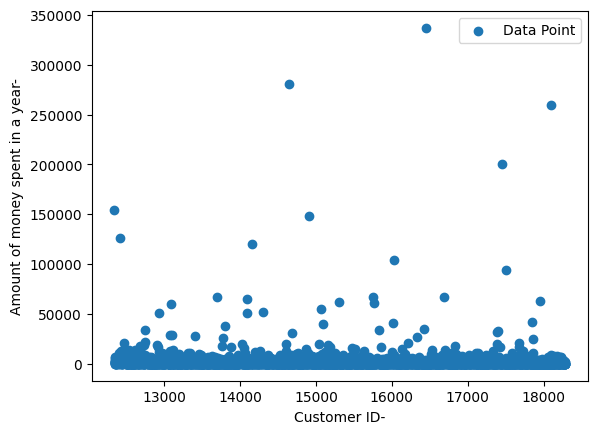

In [ ]:
'''
Plotting and visualizing how much money is spent by a single customer ID
'''

dict_customer_amt = {}
for i in range(len(data_temp)):

  if(data_temp["CustomerID"].iloc[i] is not np.nan):
    if(data_temp["CustomerID"].iloc[i] in dict_customer_amt.keys()):
      dict_customer_amt[data_temp["CustomerID"].iloc[i]] += data_temp["Amount"].iloc[i]
    else:
      dict_customer_amt[data_temp["CustomerID"].iloc[i]] = data_temp["Amount"].iloc[i]
plt.scatter(list(dict_customer_amt.keys()),list(dict_customer_amt.values()))
plt.xlabel("Customer ID-")
plt.ylabel("Amount of money spent in a year-")
plt.legend(["Data Point"])
plt.show()

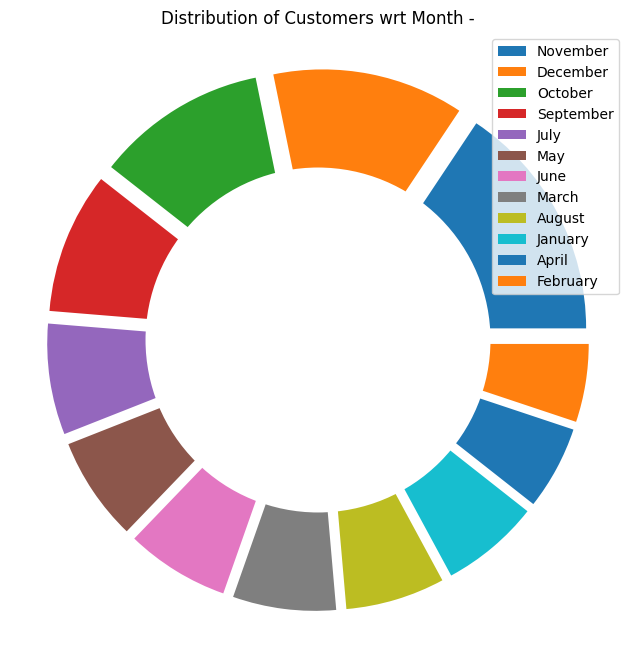

In [ ]:
'''
Seeing no of sales of the company in every month of the year
'''

month_names = ["January","February","March","April","May","June","July","August","September","October","November","December"]
updated_names = []
plt.rcdefaults()
plt.figure(figsize=(8,8))
keys_list = list(dict(data_temp["Month"].value_counts()).keys())
for i in range(len(keys_list)):
  updated_names.append(month_names[int(keys_list[i])-1])

explode_values = np.zeros(len(month_names))
explode_values = explode_values+0.1

plt.pie(data_temp["Month"].value_counts(),explode=explode_values)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(updated_names)
plt.title("Distribution of Customers wrt Month -")
plt.show()


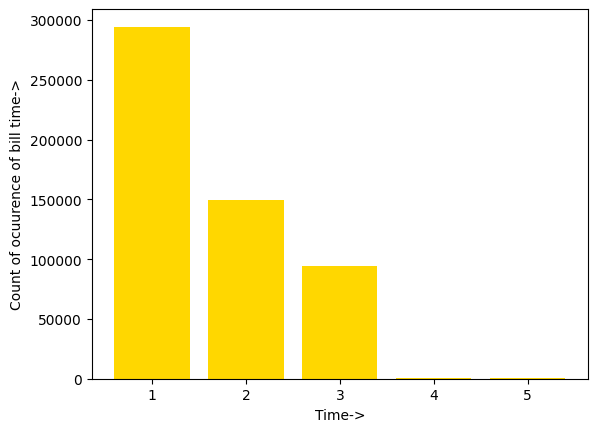

In [ ]:
'''
Seeing how much sale is done in every bin of time
'''
plt.bar([1,2,3,4,5],data_temp["Time"].value_counts(),color="gold")
plt.xlabel("Time->")
plt.ylabel("Count of ocuurence of bill time->")
plt.show()

In [ ]:
'''
Finding how much elements were purchased by a person in single visit based on Invoice NO
'''
invoice_no_with_no_of_item = {}
for i in range(len(data_temp)):
  if(data_temp["InvoiceNo"].iloc[i] in invoice_no_with_no_of_item.keys()):
    invoice_no_with_no_of_item[data_temp["InvoiceNo"].iloc[i]] += 1
  else:
    invoice_no_with_no_of_item[data_temp["InvoiceNo"].iloc[i]] = 1

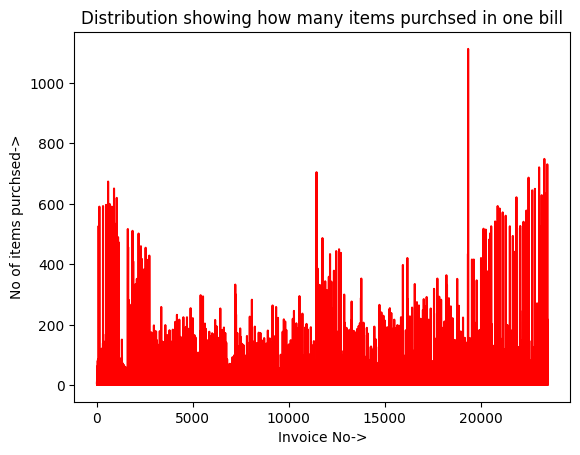

In [ ]:
plt.plot(invoice_no_with_no_of_item.values(),color="r")
plt.xlabel("Invoice No->")
plt.ylabel("No of items purchsed->")
plt.title("Distribution showing how many items purchsed in one bill")
plt.show()

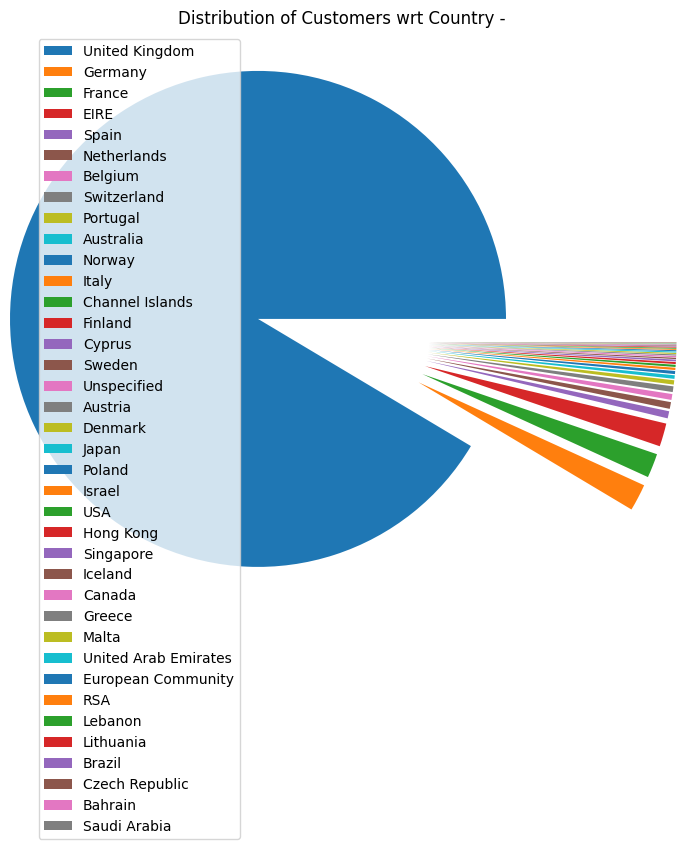

In [ ]:
'''
Distribution of sales of company according to different countries
'''

plt.rcdefaults()
Country_names = dict(data["Country"].value_counts()).keys()
plt.figure(figsize=(8,10))
explode_values = np.zeros(len(Country_names))
explode_values = 0.35+explode_values

plt.pie(data["Country"].value_counts(),explode=explode_values)
plt.legend(Country_names)
plt.title("Distribution of Customers wrt Country -")
plt.show()

#Visualiztion for finding optimum no of clusters-

In [ ]:
data_try

InvoiceNo  Description  Quantity  UnitPrice  CustomerID  Country  \
0               0         3812         6       2.55     17850.0       36   
1               0         3820         6       3.39     17850.0       36   
2               0          870         8       2.75     17850.0       36   
3               0         1835         6       3.39     17850.0       36   
4               0         2826         6       3.39     17850.0       36   
...           ...          ...       ...        ...         ...      ...   
406171      19942         2300        12       0.85     12680.0       13   
406172      19942          704         6       2.10     12680.0       13   
406173      19942          708         4       4.15     12680.0       13   
406174      19942          707         4       4.15     12680.0       13   
406175      19942          271         3       4.95     12680.0       13   

        Month  Time  Amount  
0          12     2   15.30  
1          12     2   20.34  
2          12     2   22.00  
3          12     2   20.34  
4          12     2   20.34  
...       ...   ...     ...  
406171     12     3   10.20  
406172     12     3   12.60  
406173     12     3   16.60  
406174     12     3   16.60  
406175     12     3   14.85  

[406176 rows x 9 columns]

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4).fit(data_try)

In [ ]:
random_data_x = []
random_data_y = []
no_of_points=50000
for i in range(no_of_points):
  ind= random.randint(0,len(data_try)-1)
  random_data_x.append(data_try.iloc[ind].to_numpy())
  random_data_y.append(model.labels_[ind])
random_data_x = np.array(random_data_x)
data_reduced_for_silhoutte = pd.DataFrame(random_data_x,columns=data_try.columns)

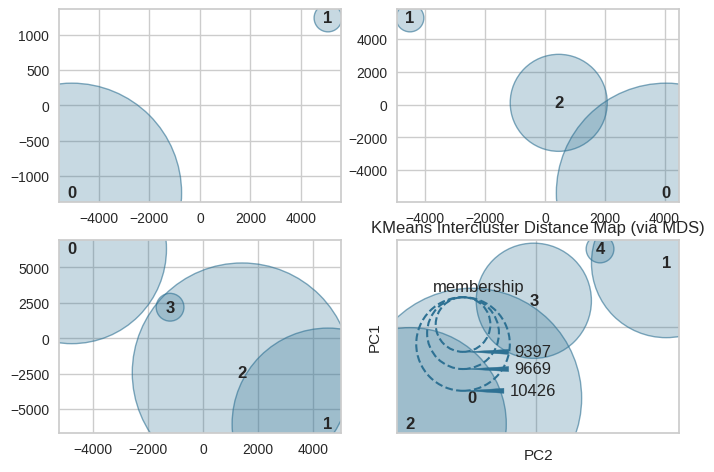

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
'''
Obtaining and Visualizing InterClusterDistance so that we can see how many clusters are optimum
'''

from yellowbrick.cluster import SilhouetteVisualizer,InterclusterDistance
from yellowbrick.datasets import load_nfl
from yellowbrick.features import RadViz
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

model_silhoutte = KMeans(n_clusters=2)
model_silhoutte.fit(data_reduced_for_silhoutte)
visualizer = InterclusterDistance(model_silhoutte, colors='yellowbrick',ax=ax1)
visualizer.fit(data_reduced_for_silhoutte)
# visualizer.show()
model_silhoutte = KMeans(n_clusters=3)
model_silhoutte.fit(data_reduced_for_silhoutte)
visualizer = InterclusterDistance(model_silhoutte, colors='yellowbrick',ax=ax2)
visualizer.fit(data_reduced_for_silhoutte)
# visualizer.show()
model_silhoutte = KMeans(n_clusters=4)
model_silhoutte.fit(data_reduced_for_silhoutte)
visualizer = InterclusterDistance(model_silhoutte, colors='yellowbrick',ax=ax3)
visualizer.fit(data_reduced_for_silhoutte)
# visualizer.show()
model_silhoutte = KMeans(n_clusters=5)
model_silhoutte.fit(data_reduced_for_silhoutte)
visualizer = InterclusterDistance(model_silhoutte, colors='yellowbrick',ax=ax4)
visualizer.fit(data_reduced_for_silhoutte)
visualizer.show()

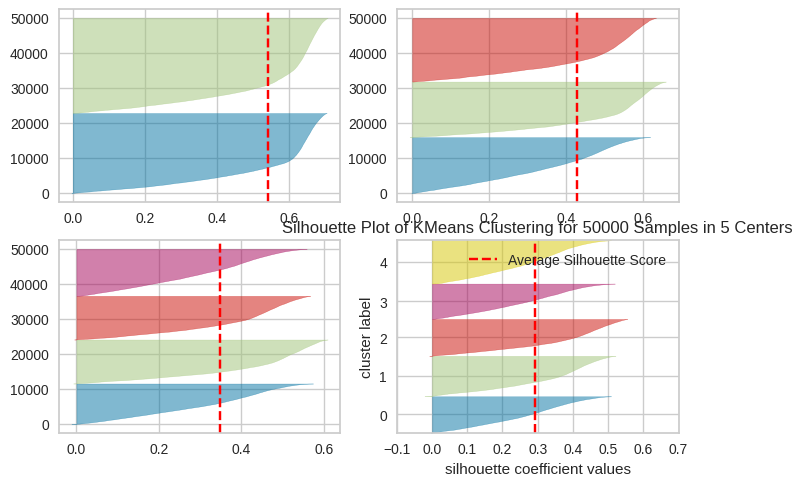

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
'''
Obtaining and Visualizing Silhouette Distance and plotting their graph so that we can see how many clusters are optimum
'''
from yellowbrick.cluster import SilhouetteVisualizer,InterclusterDistance
from yellowbrick.datasets import load_nfl
from yellowbrick.features import RadViz
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

model_silhoutte = KMeans(n_clusters=2)
model_silhoutte.fit(data_reduced_for_silhoutte)
visualizer = SilhouetteVisualizer(model_silhoutte, colors='yellowbrick',ax=ax1)
visualizer.fit(data_reduced_for_silhoutte)
# visualizer.show()
model_silhoutte = KMeans(n_clusters=3)
model_silhoutte.fit(data_reduced_for_silhoutte)
visualizer = SilhouetteVisualizer(model_silhoutte, colors='yellowbrick',ax=ax2)
visualizer.fit(data_reduced_for_silhoutte)
# visualizer.show()
model_silhoutte = KMeans(n_clusters=4)
model_silhoutte.fit(data_reduced_for_silhoutte)
visualizer = SilhouetteVisualizer(model_silhoutte, colors='yellowbrick',ax=ax3)
visualizer.fit(data_reduced_for_silhoutte)
# visualizer.show()
model_silhoutte = KMeans(n_clusters=5)
model_silhoutte.fit(data_reduced_for_silhoutte)
visualizer = SilhouetteVisualizer(model_silhoutte, colors='yellowbrick',ax=ax4)
visualizer.fit(data_reduced_for_silhoutte)
visualizer.show()

In [ ]:
'''
Obtaining and Visualizing Inertia of model for various clusters and finally using elbow method so that we can see how many clusters are optimum
'''
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
for k in range(2, 8):
    model_temp = KMeans(n_clusters=k).fit(data_try)
    model_temp.fit(data_try)
    distortions.append(sum(np.min(cdist(data_try, model_temp.cluster_centers_,'euclidean'), axis=1)) / data_try.shape[0])
    inertias.append(model_temp.inertia_)
    mapping1[k] = sum(np.min(cdist(data_try, model_temp.cluster_centers_,'euclidean'), axis=1)) / data_try.shape[0]
    mapping2[k] = model_temp.inertia_

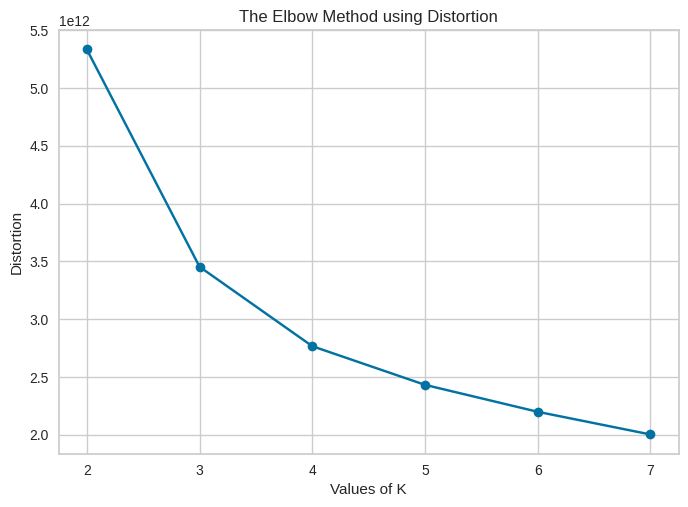

In [ ]:
plt.plot(range(2,8), inertias, 'bx-',marker="o")
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#Models

#PCA transformation on dataset

In [ ]:
'''
Applying PCA transformation so that to convert 9 dimensional data into 2 dimensional
'''
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(data_try)
pca_df_1 = pca.transform(data_try)

pca_df_1 = pd.DataFrame(data = pca_df_1)
pca_df_1

0            1
0      -10804.279124 -2533.848899
1      -10804.238813 -2533.804605
2      -10818.886369 -2548.738418
3      -10814.095073 -2543.855151
4      -10809.174391 -2538.837473
...              ...          ...
406171   9139.133899  2592.458586
406172   9131.209177  2584.374746
406173   9131.229410  2584.396523
406174   9131.224444  2584.391460
406175   9129.059290  2582.181857

[406176 rows x 2 columns]

In [ ]:
'''
Converting and transforming dataset into 3 dimension by applying PCA with 3 components
'''

pca_2 = PCA(n_components=3)

pca_2.fit(data_try)
pca_df_2 = pca_2.transform(data_try)

pca_df_2 = pd.DataFrame(data = pca_df_2)
pca_df_2

0            1            2
0      -10804.279124 -2533.848899 -1808.499198
1      -10804.238813 -2533.804605 -1816.500170
2      -10818.886369 -2548.738418  1133.424873
3      -10814.095073 -2543.855151   168.449834
4      -10809.174391 -2538.837473  -822.525206
...              ...          ...          ...
406171   9139.133899  2592.458586  -171.474712
406172   9131.209177  2584.374746  1424.485338
406173   9131.229410  2584.396523  1420.484777
406174   9131.224444  2584.391460  1421.484751
406175   9129.059290  2582.181857  1857.474311

[406176 rows x 3 columns]

#KMeans Model on PCA with no_of_components=2 and 3

In [ ]:
'''
Applying KMeans model for both PCA no_of_components = 2 and 3 and consequently plotting their clusters on 2d and 3d plots
'''
from sklearn.cluster import KMeans

model_2 = KMeans(n_clusters = 4)
model_2.fit(pca_df_1)

sse_2 = model_2.inertia_


In [ ]:
model_3 = KMeans(n_clusters = 4)
model_3.fit(pca_df_2)

sse_3 = model_3.inertia_

In [ ]:
label_2_all = model_2.labels_
label_3_all = model_3.labels_

centroid_2 = model_2.cluster_centers_
centroid_3 = model_3.cluster_centers_

In [ ]:
print(centroid_2)
print(centroid_3)

[[ 2.63983695e+03  3.33036606e+01]
 [-8.05099005e+03 -3.60854110e+00]
 [ 7.38190001e+03 -3.92288400e+01]
 [-2.68374797e+03  7.49054052e+00]]
[[-7.98995399e+03  1.90277298e+00  1.89390331e+01]
 [ 2.72947135e+03  3.00651374e+01  5.05211096e+00]
 [-2.55805222e+03 -2.63313183e+00 -3.42127368e+01]
 [ 7.42224659e+03 -3.22096168e+01  7.50386403e+00]]


In [ ]:
import random

num = 40000
index_list = []
for i in range(0,num,1):
  temp = random.randint(0,len(pca_df_1)-1)
  index_list.append(temp)

index_list = list(set(index_list))
index_list.sort()

print(index_list)

[8, 14, 26, 43, 70, 72, 86, 87, 117, 119, 124, 137, 138, 151, 157, 158, 177, 198, 202, 208, 231, 239, 243, 269, 285, 306, 308, 319, 333, 345, 349, 357, 381, 393, 400, 403, 423, 428, 439, 443, 458, 462, 467, 470, 488, 502, 506, 509, 516, 523, 530, 531, 536, 539, 541, 544, 599, 600, 602, 603, 606, 609, 614, 620, 623, 626, 633, 637, 645, 651, 661, 664, 670, 686, 693, 753, 773, 787, 799, 806, 815, 817, 843, 865, 869, 897, 935, 943, 954, 962, 984, 995, 1001, 1008, 1011, 1020, 1031, 1037, 1038, 1089, 1094, 1096, 1113, 1115, 1118, 1119, 1149, 1151, 1166, 1176, 1198, 1200, 1205, 1221, 1247, 1256, 1265, 1275, 1279, 1285, 1287, 1295, 1301, 1314, 1336, 1344, 1348, 1353, 1385, 1397, 1420, 1432, 1443, 1449, 1471, 1483, 1499, 1501, 1515, 1535, 1546, 1552, 1558, 1582, 1626, 1631, 1641, 1643, 1652, 1664, 1670, 1676, 1683, 1701, 1704, 1709, 1722, 1754, 1765, 1766, 1768, 1770, 1774, 1791, 1798, 1804, 1812, 1826, 1844, 1853, 1856, 1905, 1906, 1909, 1913, 1916, 1924, 1941, 1952, 1964, 1982, 2011, 2012, 20

In [ ]:
temp_df_1 = pca_df_1.iloc[index_list,:]
temp_df_2 = pca_df_2.iloc[index_list,:]

label_temp = pd.DataFrame(data = label_2_all,columns = ['Y'])
label_2 = label_temp.iloc[index_list,0]
label_2.to_numpy()

label_temp = pd.DataFrame(data = label_3_all,columns = ['Y'])
label_3 = label_temp.iloc[index_list,0]
label_3.to_numpy()



array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

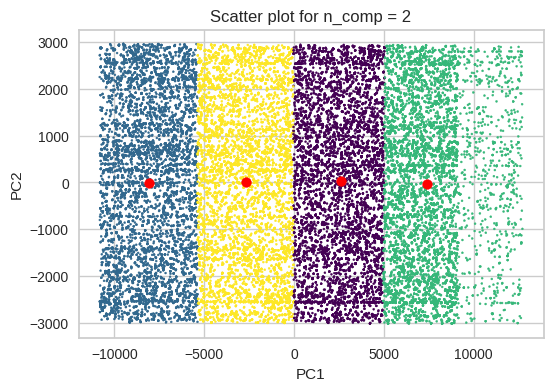

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = temp_df_1.iloc[:,0].to_numpy()
y1 = temp_df_1.iloc[:,1].to_numpy()
plt.figure(figsize=(6,4))

plt.scatter(x1,y1, c = label_2,s=2,cmap = 'viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("Scatter plot for n_comp = 2")

plt.scatter(centroid_2.T[0],centroid_2.T[1],color = 'red', marker = 'o')

plt.show()

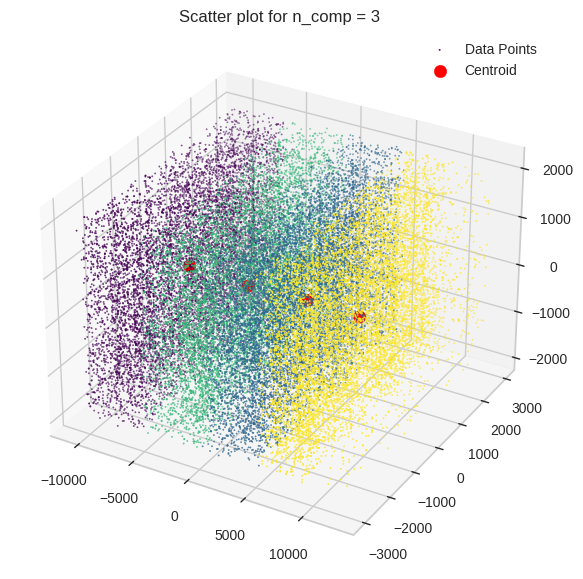

In [ ]:
x2 = temp_df_2.iloc[:,0].to_numpy()
y2 = temp_df_2.iloc[:,1].to_numpy()
z2 = temp_df_2.iloc[:,2].to_numpy()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x2, y2, z2, c = label_3,s=1, label = 'Data Points',cmap = 'viridis')
ax.scatter3D(centroid_3.T[0],centroid_3.T[1],centroid_3.T[2],color = 'red', marker = 'o',s = 80,alpha = 1,label = "Centroid")

plt.title("Scatter plot for n_comp = 3")
plt.legend()

plt.show()

#Agglomerative Model on PCA with no_of_components=2 and 3

In [ ]:
'''
Applying Agglomerative or Heirarchial model for both PCA no_of_components = 2 and 3 and consequently plotting their clusters on 2d and 3d plots
'''
agg_df_1 = pca_df_1.iloc[index_list,:]
agg_np_1 = agg_df_1.to_numpy()

agg_df_2 = pca_df_2.iloc[index_list,:]
agg_np_2 = agg_df_2.to_numpy()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_1 = AgglomerativeClustering(n_clusters = 4)

agg_1.fit(agg_np_1)

agg_label_1 = agg_1.labels_

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_2 = AgglomerativeClustering(n_clusters = 4)

agg_2.fit(agg_np_2)

agg_label_2 = agg_2.labels_

In [ ]:
from sklearn.neighbors import NearestCentroid

nc = NearestCentroid()

nc.fit(agg_np_1,agg_label_1)
agg_cent_1 = nc.centroids_

nc_2 = NearestCentroid()

nc_2.fit(agg_np_2,agg_label_2)
agg_cent_2 = nc_2.centroids_

In [ ]:
print(agg_cent_1.T)
print(agg_cent_2.T)

[[ 2342.17412232 -4052.78524134  7529.24983909 -8660.81053549]
 [ -198.46234589    12.55978967   250.68744234    77.07003191]]
[[ 2108.57952063 -3554.20919734  7096.45417824 -8380.53225369]
 [ -162.82564183   -90.25123243   172.34937552   108.95209068]
 [ -184.66999149    61.38949463   153.05476803    18.52020057]]


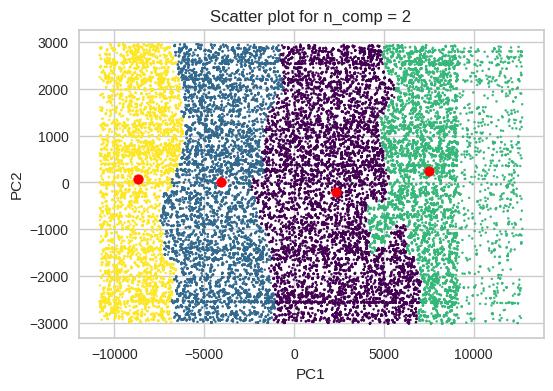

In [ ]:
x1 = (agg_np_1.T)[0]
y1 = (agg_np_1.T)[1]
plt.figure(figsize=(6,4))

plt.scatter(x1,y1, c = agg_label_1,s=2,cmap = 'viridis')
plt.scatter((agg_cent_1.T)[0],(agg_cent_1.T)[1],color = 'red', marker = 'o',alpha = 1)
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("Scatter plot for n_comp = 2")

#plt.scatter(centroid_2.T[0],centroid_2.T[1],color = 'red', marker = 'o')

plt.show()

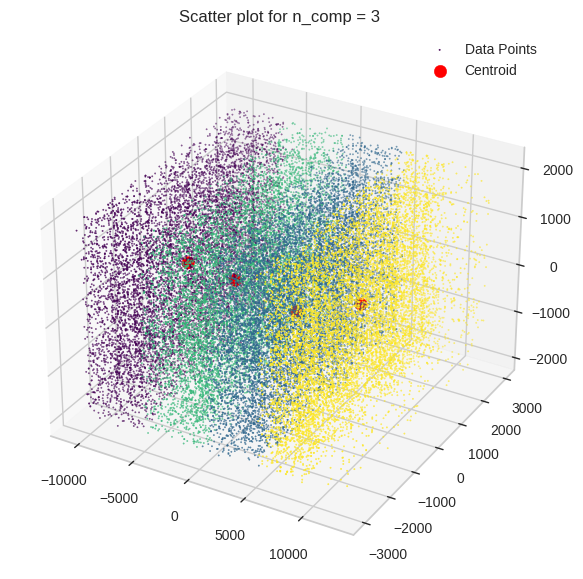

In [ ]:
x2 = agg_np_2.T[0]
y2 = agg_np_2.T[1]
z2 = agg_np_2.T[2]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x2, y2, z2, c = label_3,s=1, label = 'Data Points',cmap = 'viridis')
ax.scatter3D(agg_cent_2.T[0],agg_cent_2.T[1],agg_cent_2.T[2],color = 'red', marker = 'o',s = 80,alpha = 1,label = "Centroid")

plt.title("Scatter plot for n_comp = 3")
plt.legend()

plt.show()

#Models on Whole Dataset

In [ ]:
'''
Applying KMeans model and correspondingly Agglorematively or Heirarchial on whole dataset and consequently plotting their clusters on 2d and 3d plots
'''
model_whole = KMeans(n_clusters = 4)

model_whole.fit(data_try)
whole_labels_all = model_whole.labels_

label_temp = pd.DataFrame(data = whole_labels_all,columns = ['Y'])
whole_labels = label_temp.iloc[index_list,0]
whole_labels.to_numpy()

temp_df_3 = data_try.iloc[index_list,:]

whole_centroids = model_whole.cluster_centers_


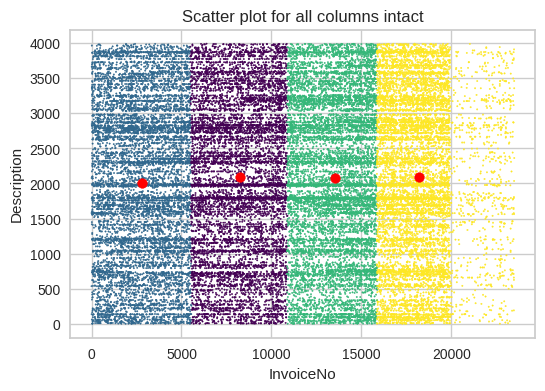

In [ ]:
col_chosen = 0
col_chosen_2 = 1
x1 = temp_df_3.iloc[:,col_chosen].to_numpy()
y1 = temp_df_3.iloc[:,col_chosen_2].to_numpy()
plt.figure(figsize=(6,4))

plt.scatter(x1,y1, c = whole_labels,s=1,cmap = 'viridis')
plt.xlabel(temp_df_3.columns[col_chosen])
plt.ylabel(temp_df_3.columns[col_chosen_2])

plt.title("Scatter plot for all columns intact")

plt.scatter(whole_centroids.T[col_chosen],whole_centroids.T[col_chosen_2],color = 'red', marker = 'o')

plt.show()

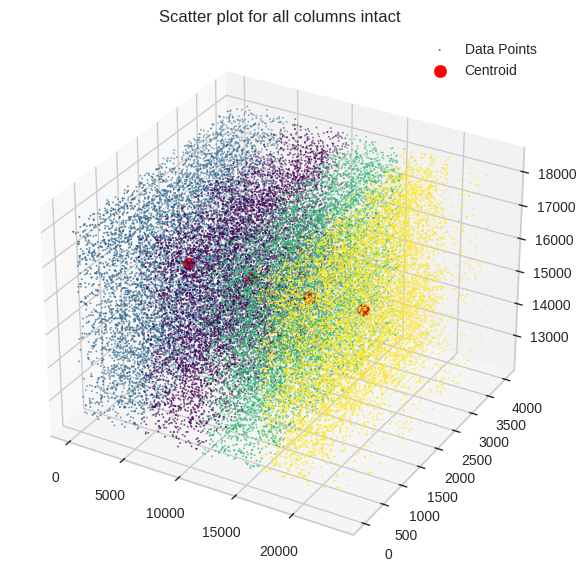

In [ ]:
x2 = temp_df_3.iloc[:,0].to_numpy()
y2 = temp_df_3.iloc[:,1].to_numpy()
z2 = temp_df_3.iloc[:,4].to_numpy()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x2, y2, z2, c = whole_labels,s=1, label = 'Data Points',cmap = 'viridis')
ax.scatter3D(whole_centroids.T[0],whole_centroids.T[1],whole_centroids.T[4],color = 'red', marker = 'o',s = 80,alpha = 1,label = "Centroid")

plt.title("Scatter plot for all columns intact")
plt.legend()

plt.show()

In [ ]:
agg_df_3 = data_try.iloc[index_list,:]
agg_np_3 = agg_df_3.to_numpy()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_3 = AgglomerativeClustering(n_clusters = 4)

agg_3.fit(agg_np_3)

agg_label_3 = agg_3.labels_

In [ ]:
nc_3 = NearestCentroid()

nc_3.fit(agg_np_3,agg_label_3)
agg_cent_3 = nc_3.centroids_


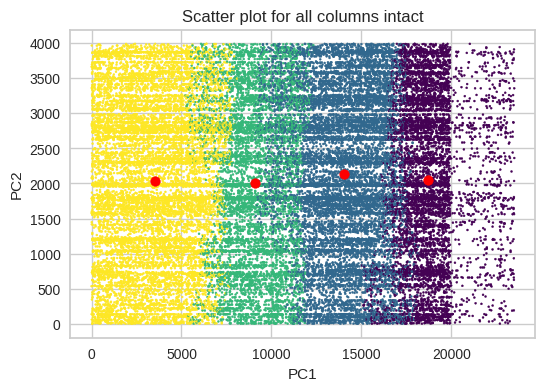

In [ ]:
x1 = (agg_np_3.T)[0]
y1 = (agg_np_3.T)[1]
plt.figure(figsize=(6,4))

plt.scatter(x1,y1, c = agg_label_3,s=2,cmap = 'viridis')
plt.scatter((agg_cent_3.T)[0],(agg_cent_3.T)[1],color = 'red', marker = 'o',alpha = 1)
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("Scatter plot for all columns intact")

#plt.scatter(centroid_2.T[0],centroid_2.T[1],color = 'red', marker = 'o')

plt.show()

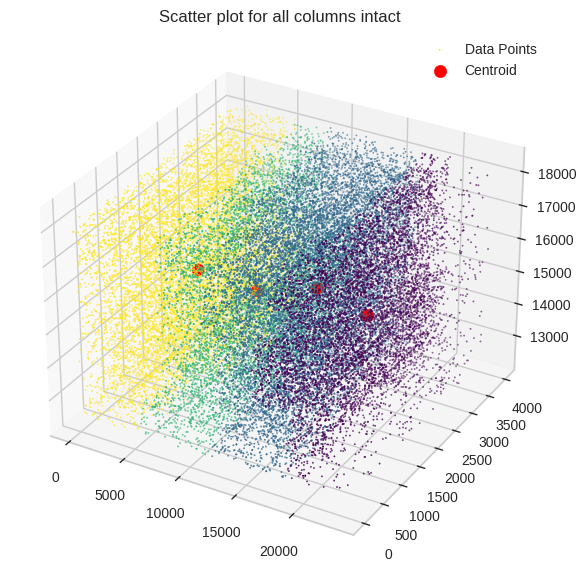

In [ ]:
x2 = agg_np_3.T[0]
y2 = agg_np_3.T[1]
z2 = agg_np_3.T[4]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x2, y2, z2, c = agg_label_3,s=1, label = 'Data Points',cmap = 'viridis')
ax.scatter3D(agg_cent_3.T[0],agg_cent_3.T[1],agg_cent_3.T[4],color = 'red', marker = 'o',s = 80,alpha = 1,label = "Centroid")

plt.title("Scatter plot for all columns intact")
plt.legend()

plt.show()

In [ ]:
whole_centroids

array([[8.23821899e+03, 2.09145638e+03, 1.32722049e+01, 3.12695617e+00,
        1.52978736e+04, 3.37070213e+01, 5.59711970e+00, 2.78850218e+00,
        2.28101702e+01],
       [2.81499204e+03, 2.01147401e+03, 1.33901434e+01, 3.12194378e+00,
        1.52992977e+04, 3.37525142e+01, 4.77699724e+00, 2.78177296e+00,
        2.27827263e+01],
       [1.35152768e+04, 2.07939418e+03, 1.35705948e+01, 2.88652662e+00,
        1.52456809e+04, 3.34551076e+01, 9.02623214e+00, 2.80773446e+00,
        2.30994048e+01],
       [1.82137283e+04, 2.09821305e+03, 1.33568518e+01, 3.06914898e+00,
        1.53124215e+04, 3.40988210e+01, 1.07468211e+01, 2.89047122e+00,
        2.32818615e+01]])

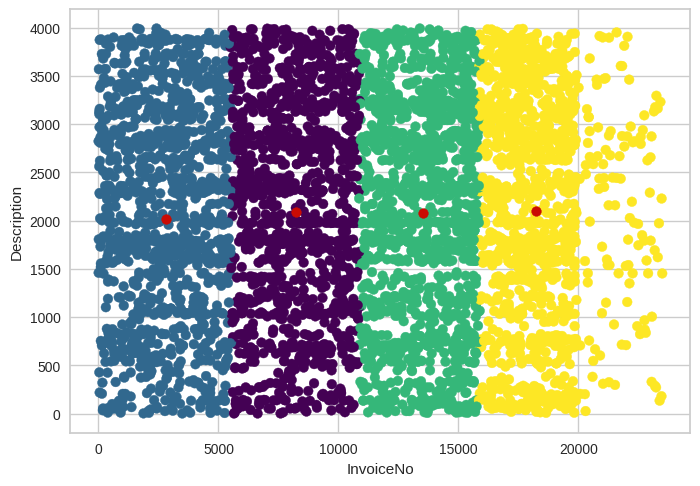

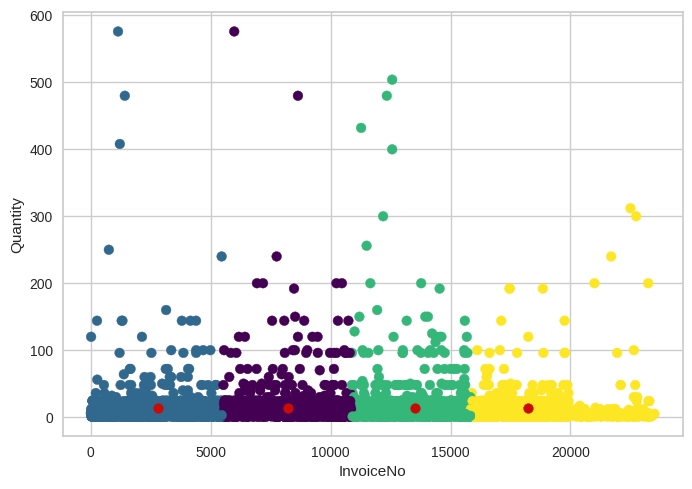

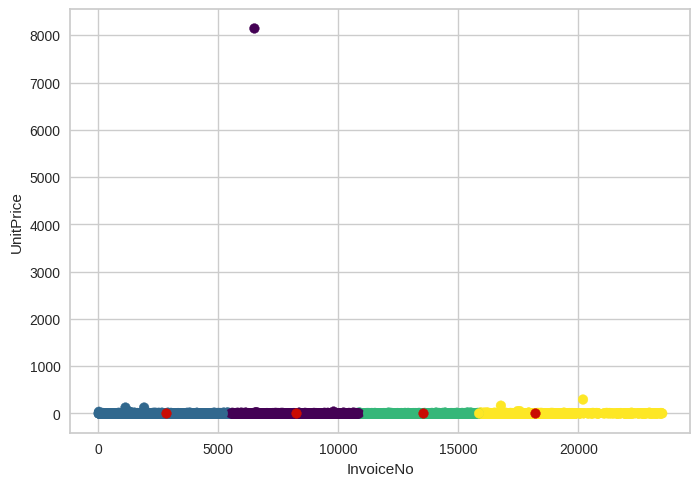

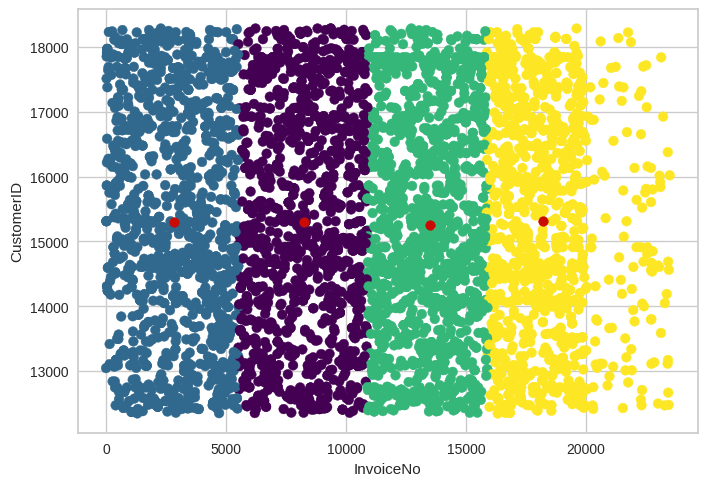

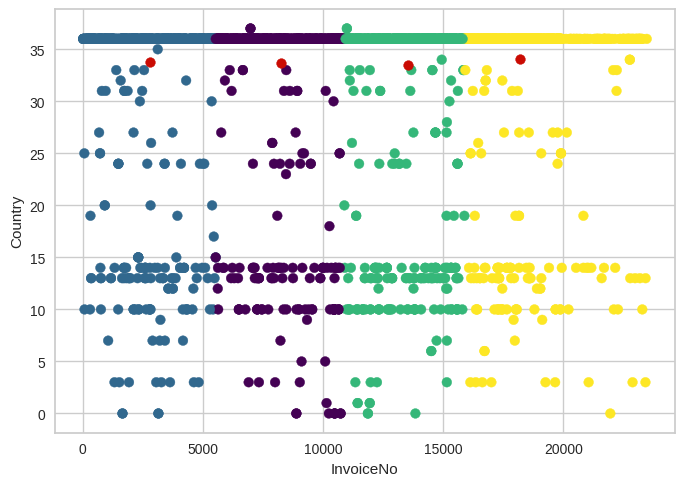

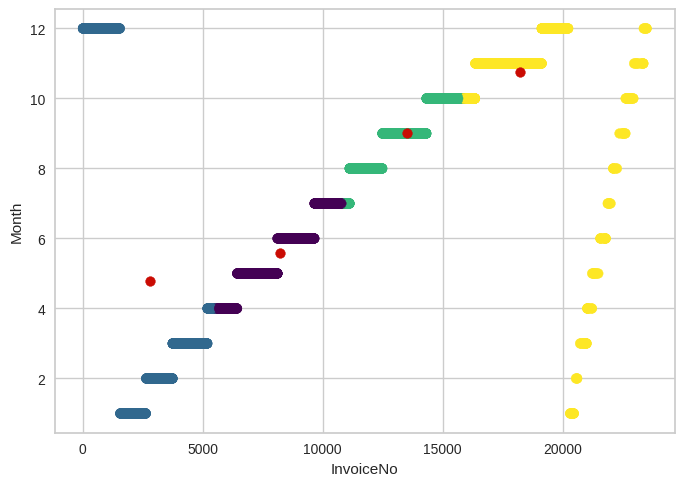

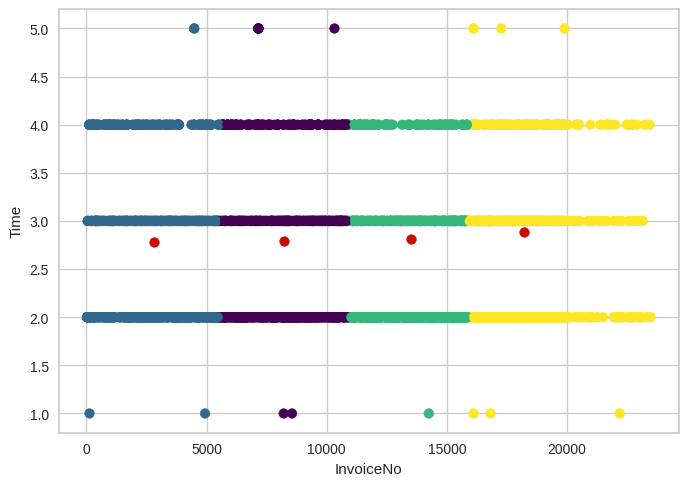

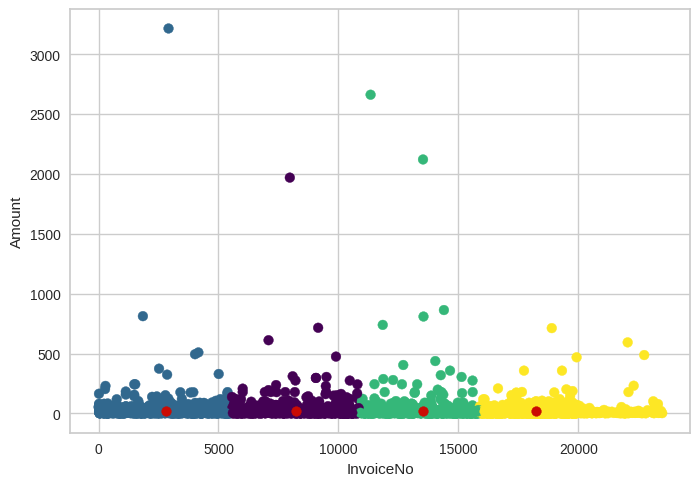

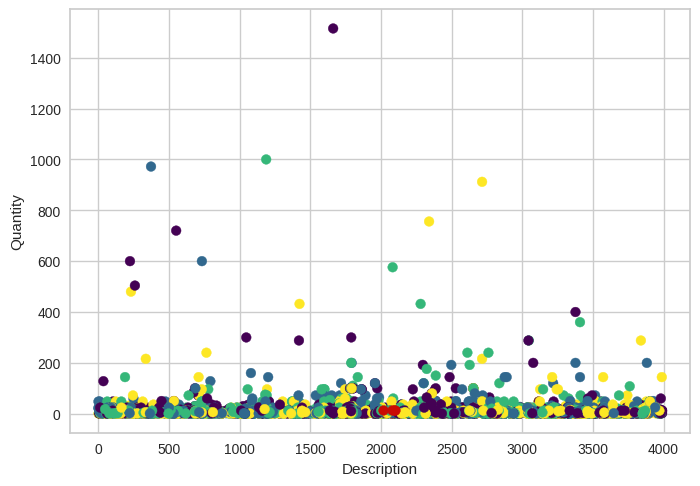

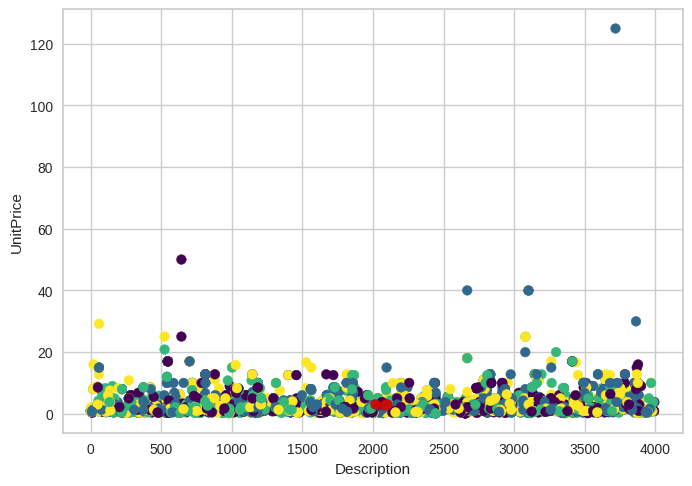

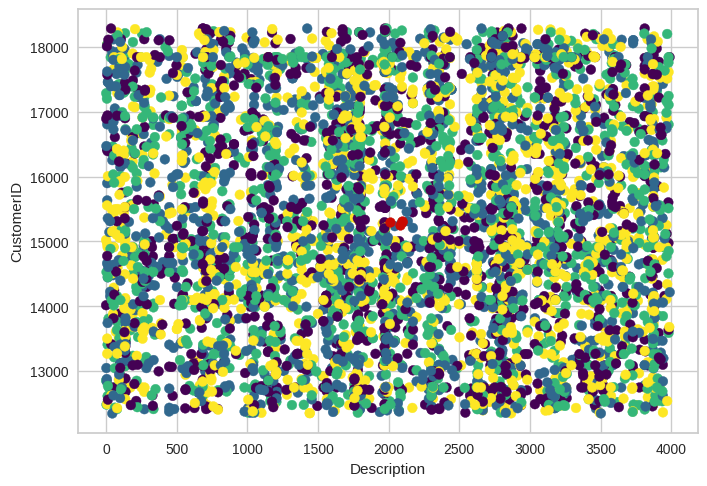

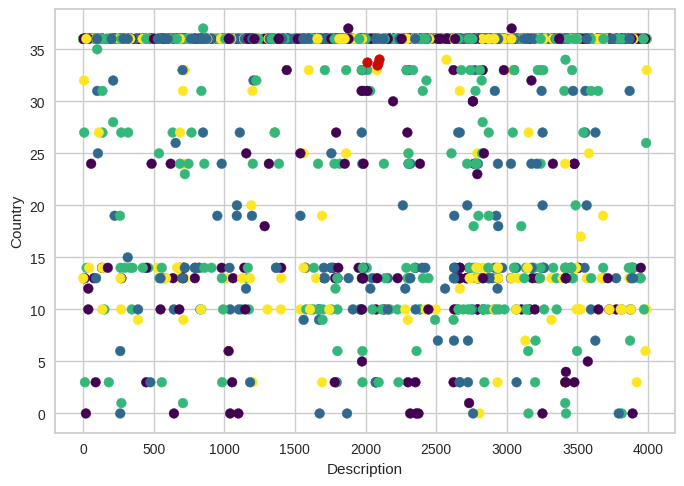

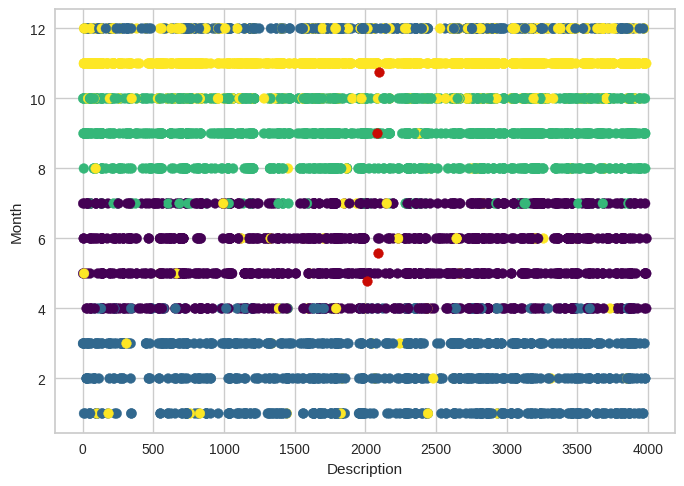

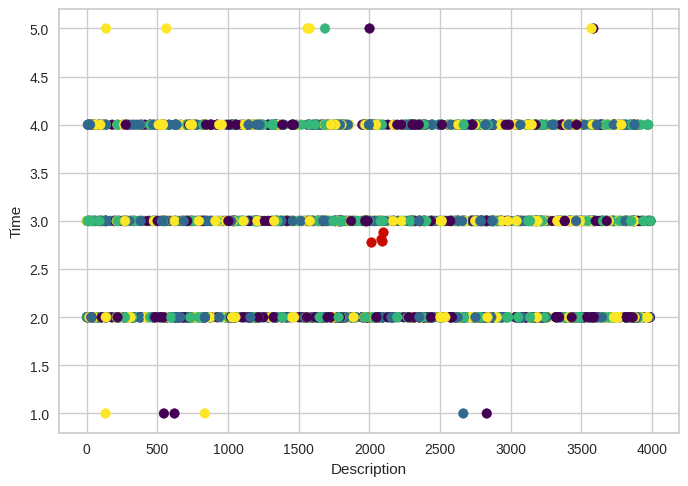

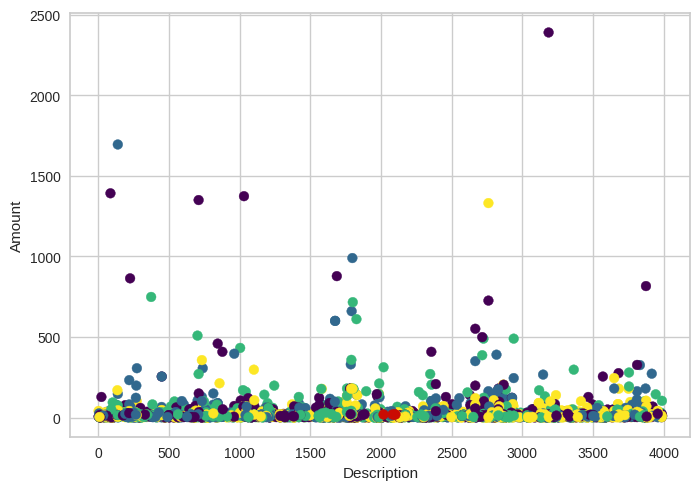

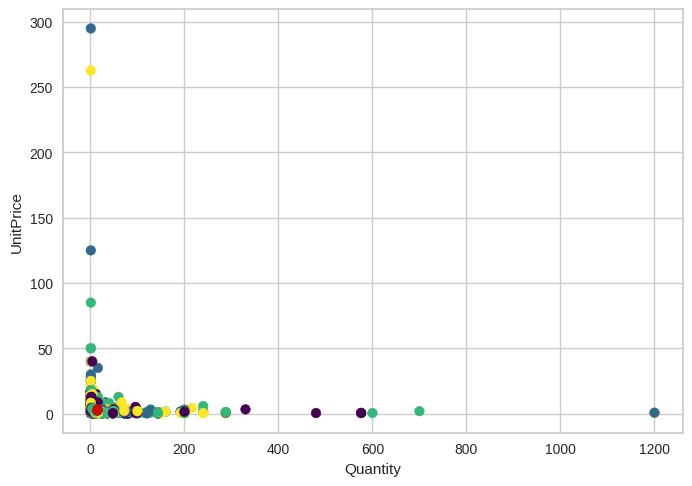

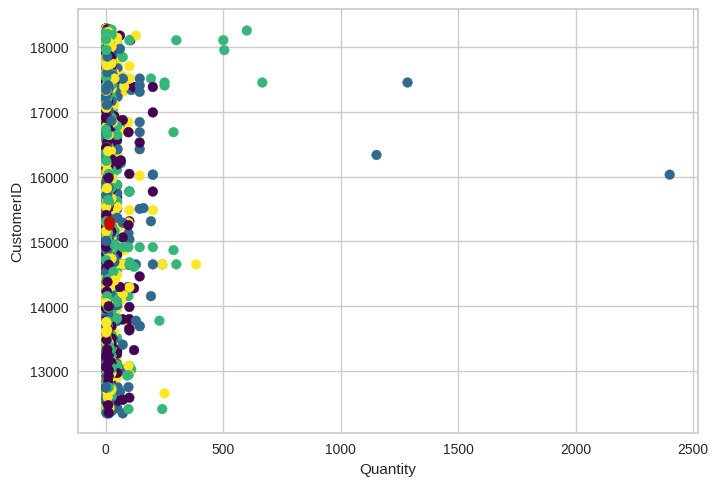

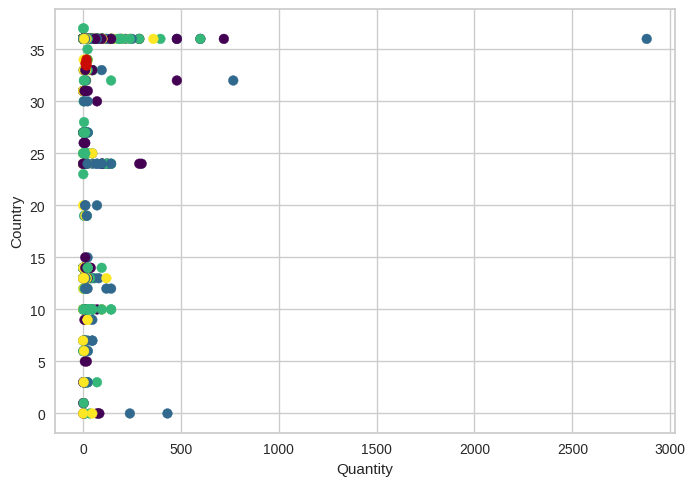

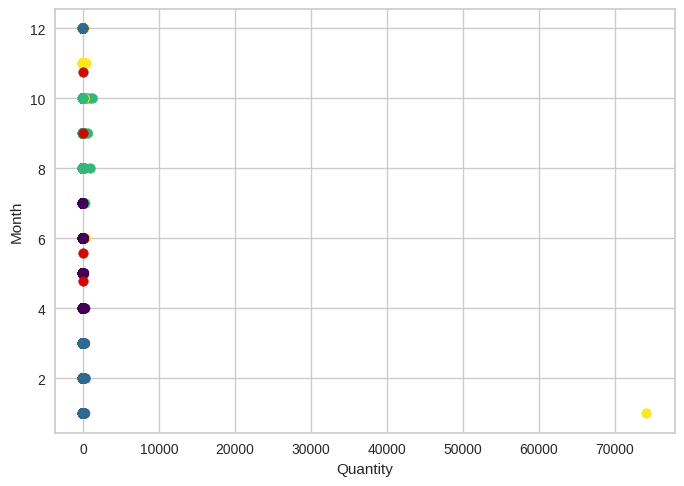

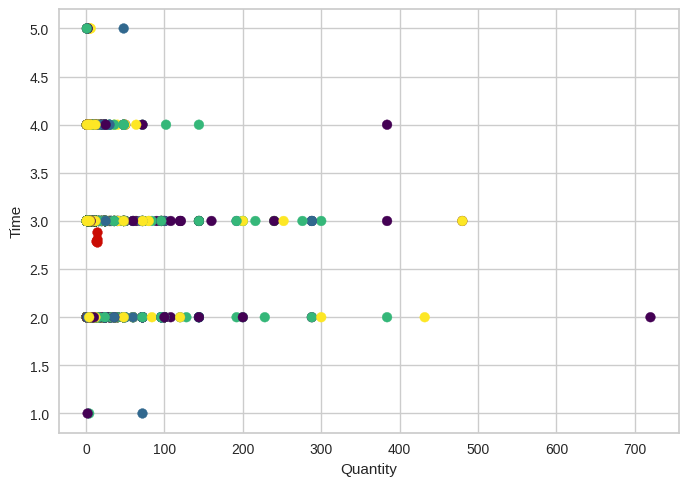

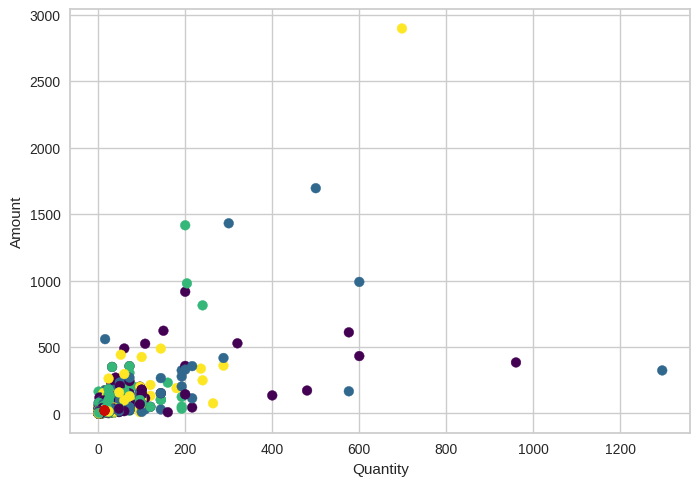

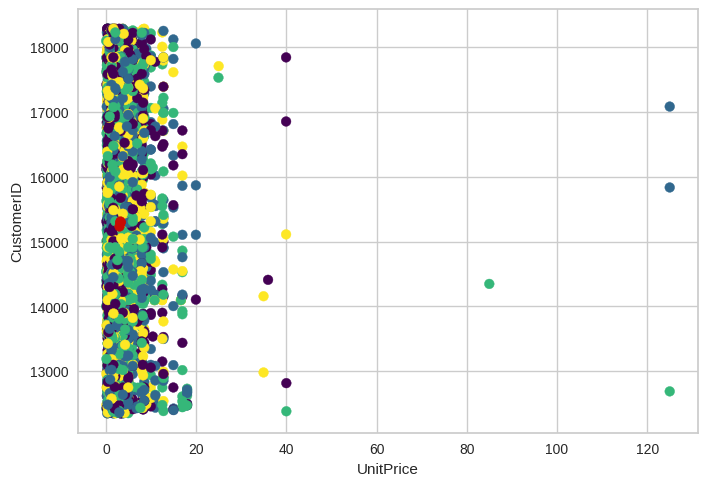

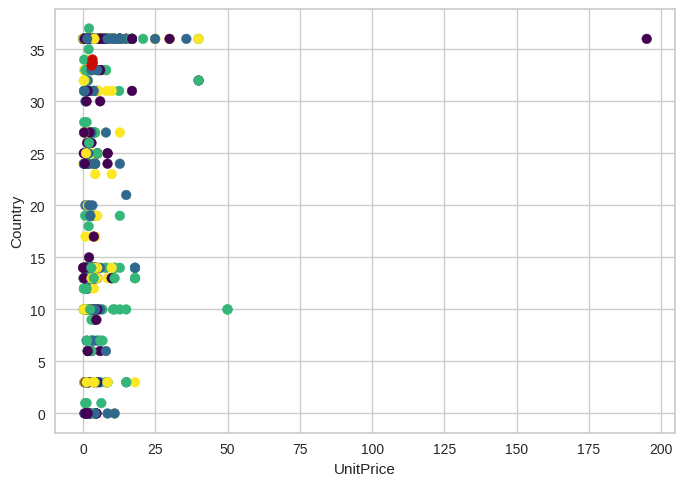

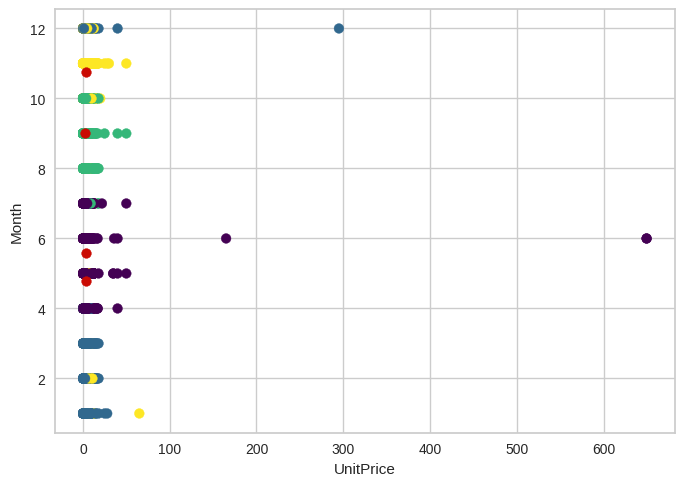

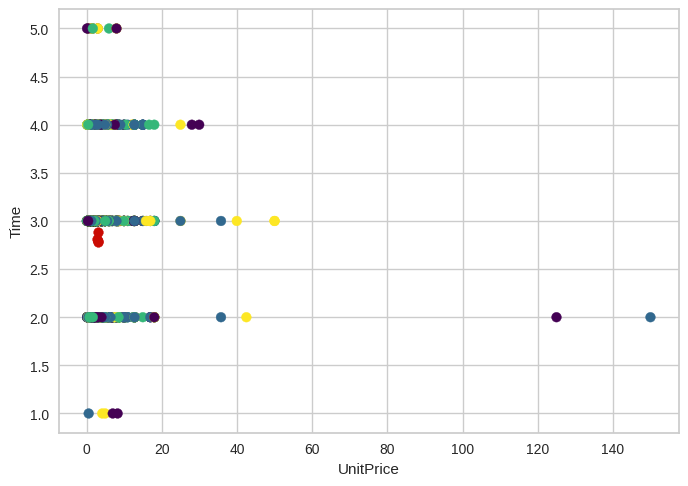

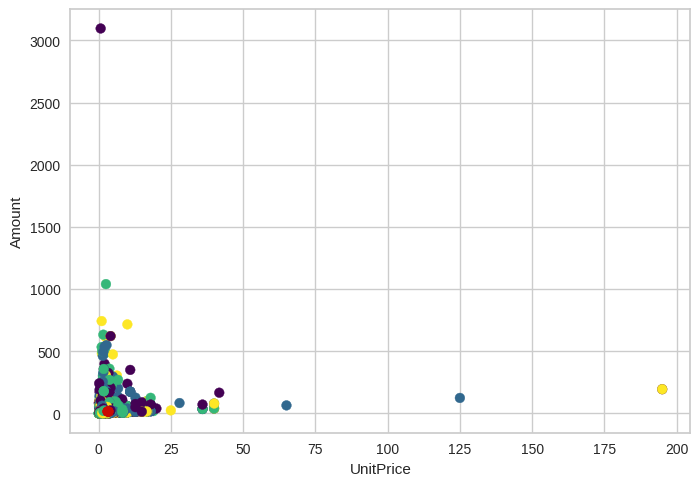

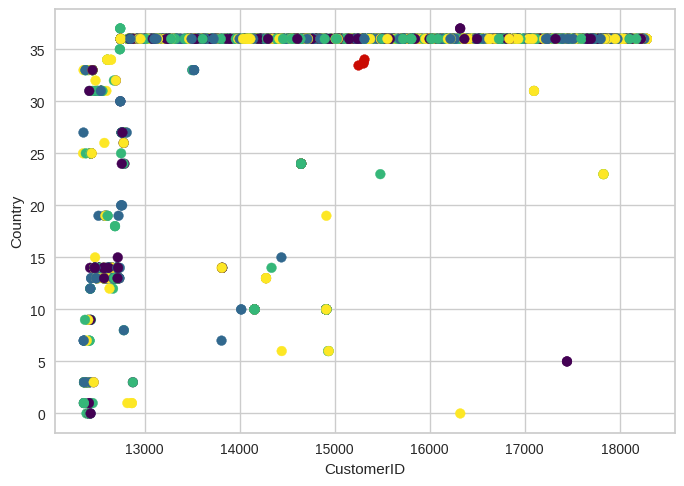

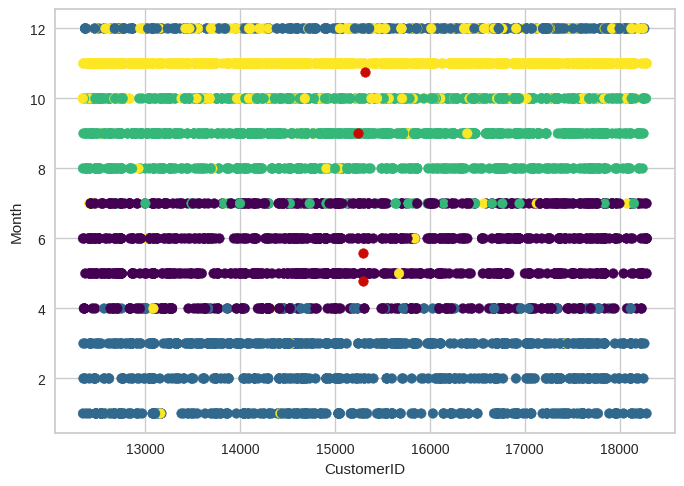

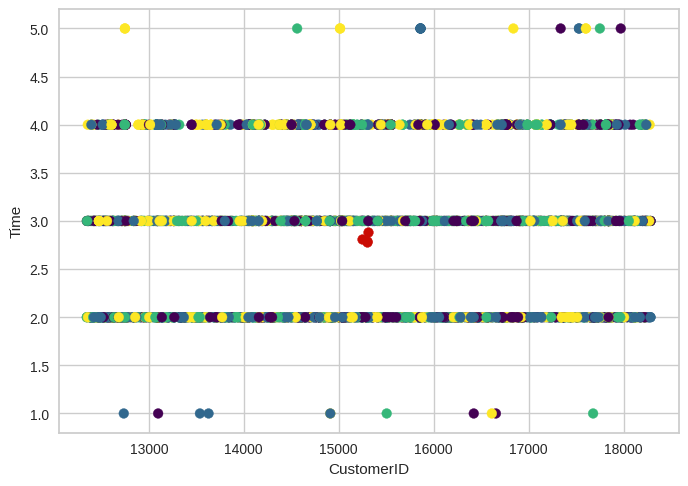

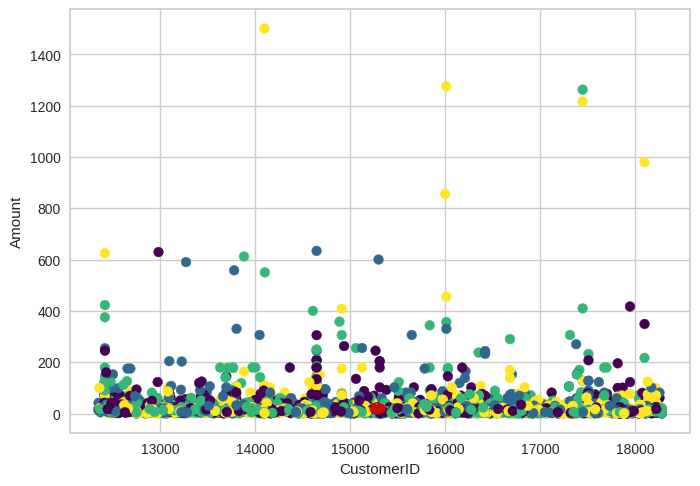

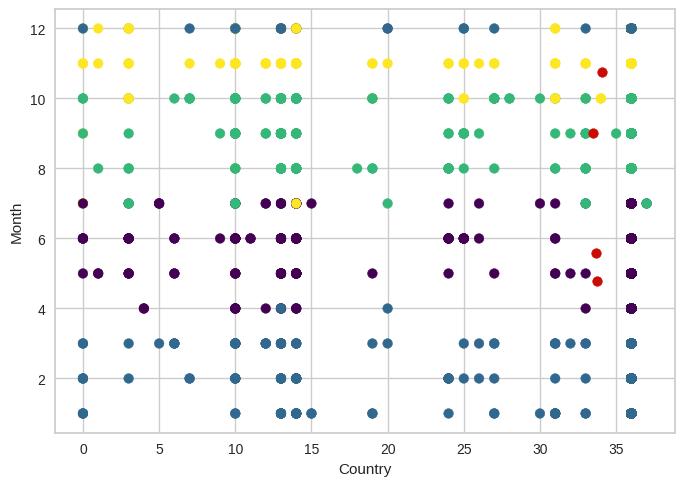

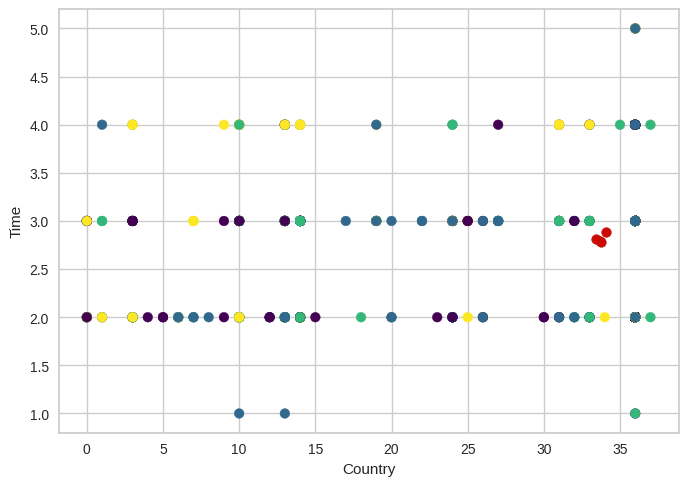

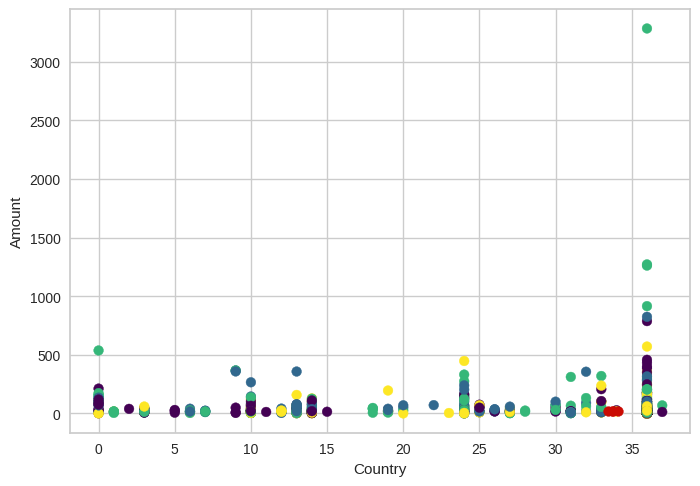

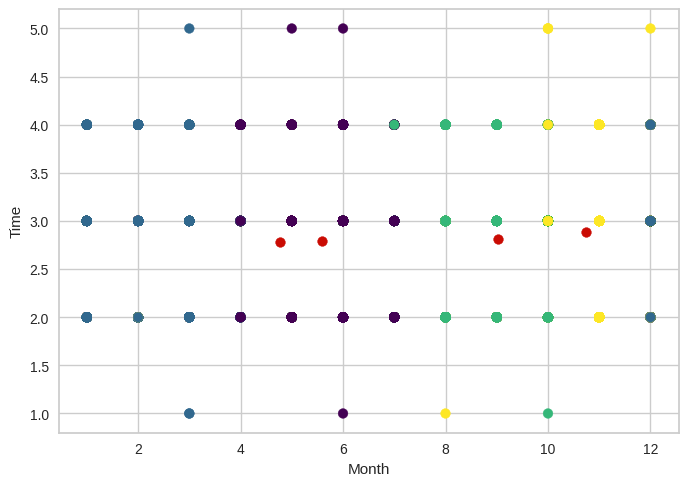

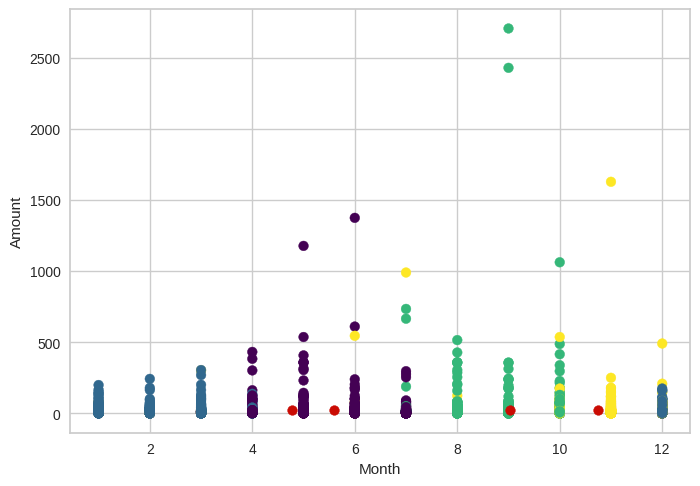

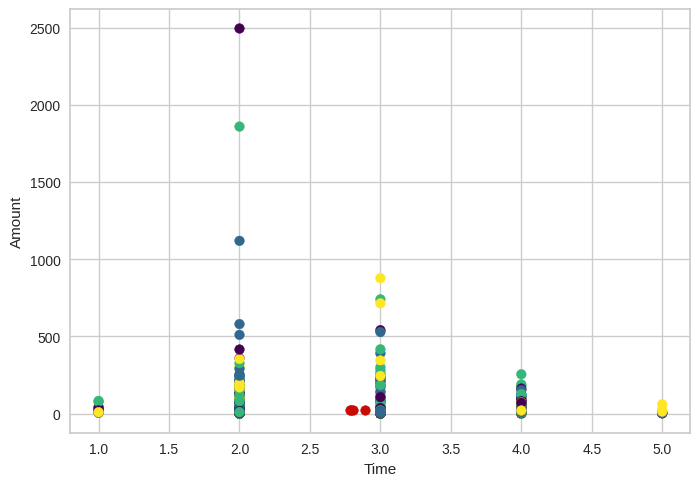

In [ ]:
'''
Plotting and Visualizing clusters on all subsets by taking two columsn from all columns
'''
label_list = whole_labels_all
for l in range(len(data_try.columns)):
  for k in range(l+1,len(data_try.columns)):
    if(l!=k):
      ind = []
      for i in range(5000):
        ind.append(random.randint(0,len(data_try)-1))
      y_ind = []
      for i in ind:
        y_ind.append(label_list[i])

      plt.scatter(data_try[data_try.columns[l]].iloc[ind].to_numpy(),data_try[data_try.columns[k]].iloc[ind].to_numpy(),c = y_ind,cmap="viridis")
      for j in range(4):
        plt.scatter(whole_centroids[j][l],whole_centroids[j][k],color="r")
      plt.xlabel(data_try.columns[l])
      plt.ylabel(data_try.columns[k])

      plt.show()

#Results

In [ ]:
'''
These are all the metrics which we used for finally seeing how are model performed on all the PCA with no_of_components=2,3 and further
on whole dataset
'''
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score


In [ ]:
def cal_metrics(dataset,isKmeans = True):
  if isKmeans == True:
    model = KMeans(n_clusters = 4)
  else:
    model = AgglomerativeClustering(n_clusters = 4)

  model.fit(dataset)
  if isKmeans == True:
    inertia = model.inertia_
  else:
    inertia = "-"
  sil_score = silhouette_score(dataset, model.labels_)
  chs = calinski_harabasz_score(dataset, model.labels_)
  dbs = davies_bouldin_score(dataset, model.labels_)

  return inertia,sil_score,chs,dbs

In [ ]:
metric_list = []
df_list = [agg_np_1,agg_np_2,agg_np_3]

for i in range(0,6,1):
  if i<3:
    temp_metrics = cal_metrics(df_list[i])
  else:
    temp_metrics = cal_metrics(df_list[i-3],False)
  metric_list.append(temp_metrics)

print(metric_list)

[(203413243234.0421, 0.3957613872823062, 78836.11762968544, 0.8500866948048321), (251076884187.83252, 0.34749074868107915, 63871.13609425703, 0.9674557856807204), (286314309385.9605, 0.34663609783008315, 56009.67449736726, 0.9696319284933848), ('-', 0.35269704357965137, 68243.94843284885, 0.8986219124833608), ('-', 0.32289952584262016, 59254.13604801025, 1.0117958337105155), ('-', 0.2951636777280024, 48656.2423305648, 1.0213093494951362)]


In [ ]:
'''
Finally printing and craeting dataframe for all the scores of all models with all datasets both original and PCA transformed.
'''
metric_list = np.array(metric_list)
metric_df = pd.DataFrame(index=['PCA n_comp = 2','PCA n_comp = 3','Original Dataset','PCA n_comp = 2','PCA n_comp = 3','Original Dataset'])
# metric_df['Dataframe'] =
metric_df['K-Means'] = ['Yes','Yes','Yes','No','No','No']
metric_df['Hierarchical'] = ['No','No','No','Yes','Yes','Yes']
metric_df['Inertia'] = metric_list.T[0]
metric_df['Silhouette Score'] = metric_list.T[1]
metric_df['Calinski Harabasz score'] = metric_list.T[2]
metric_df['Davies Bouldin score'] = metric_list.T[3]

metric_df

K-Means Hierarchical             Inertia  \
PCA n_comp = 2       Yes           No   203413243234.0421   
PCA n_comp = 3       Yes           No  251076884187.83252   
Original Dataset     Yes           No   286314309385.9605   
PCA n_comp = 2        No          Yes                   -   
PCA n_comp = 3        No          Yes                   -   
Original Dataset      No          Yes                   -   

                     Silhouette Score Calinski Harabasz score  \
PCA n_comp = 2     0.3957613872823062       78836.11762968544   
PCA n_comp = 3    0.34749074868107915       63871.13609425703   
Original Dataset  0.34663609783008315       56009.67449736726   
PCA n_comp = 2    0.35269704357965137       68243.94843284885   
PCA n_comp = 3    0.32289952584262016       59254.13604801025   
Original Dataset   0.2951636777280024        48656.2423305648   

                 Davies Bouldin score  
PCA n_comp = 2     0.8500866948048321  
PCA n_comp = 3     0.9674557856807204  
Original Dataset   0.9696319284933848  
PCA n_comp = 2     0.8986219124833608  
PCA n_comp = 3     1.0117958337105155  
Original Dataset   1.0213093494951362